In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("./full_data.csv")

In [3]:
df = df.drop(columns=["filename"])

# Down Sampling:

In [ ]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]
value_counts = df['kelas'].value_counts()
total_count = df.shape[0]
class_counts = []
for i in value_counts:
    class_counts.append(i)
excludeColumn = value_counts.idxmin()
columnSaved = value_counts[value_counts.index!=excludeColumn].index
minorityClass = df[df.kelas == excludeColumn].index
selected_examples = []
for col in columnSaved:
  major = df[df.kelas == col].index
  num_examples = min(class_counts)
  
  # Loop through each class
  class_examples = np.random.choice(major, size=num_examples, replace=False)
    
    # Add the selected examples to the list
  selected_examples.extend(class_examples)
  print("Total of",col,":",len(class_examples))
undersampleIndices = np.concatenate([minorityClass,selected_examples])
df = df.loc[undersampleIndices]

Total of FNSZ : 230
Total of GNSZ : 230


In [ ]:
df.kelas.value_counts()

CPSZ    230
FNSZ    230
GNSZ    230
Name: kelas, dtype: int64

# Tanpa downsampling:

In [4]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]

# Label Encoding: 

In [5]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['kelas']= label_encoder.fit_transform(df['kelas'])
le_name_mapping = dict(zip(label_encoder.classes_, 
                            label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

df['kelas'].unique()

{'CPSZ': 0, 'FNSZ': 1, 'GNSZ': 2}


array([1, 2, 0])

In [6]:
y = df['kelas']
x = df.drop(columns='kelas') #siapkan x dan y

# Over sampling:

In [7]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# data splitting:

In [8]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state = 0)

# KNN:

## Euclidean:

In [9]:
def euclidean_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='euclidean').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

        CPSZ       0.88      0.93      0.90        95
        FNSZ       0.92      0.92      0.92        98
        GNSZ       0.94      0.89      0.91        87

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280



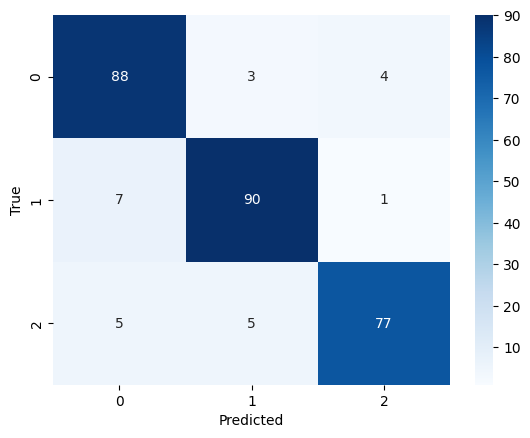


Nilai n =  3
Accuracy: 0.7678571428571429
              precision    recall  f1-score   support

        CPSZ       0.77      0.93      0.84        95
        FNSZ       0.80      0.57      0.67        98
        GNSZ       0.75      0.82      0.78        87

    accuracy                           0.77       280
   macro avg       0.77      0.77      0.76       280
weighted avg       0.77      0.77      0.76       280



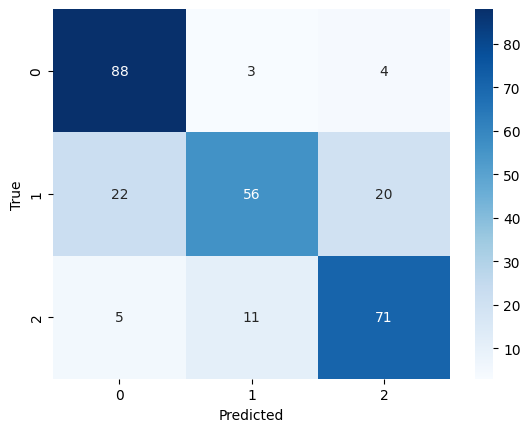


Nilai n =  5
Accuracy: 0.75
              precision    recall  f1-score   support

        CPSZ       0.75      0.89      0.82        95
        FNSZ       0.77      0.55      0.64        98
        GNSZ       0.73      0.82      0.77        87

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.74       280
weighted avg       0.75      0.75      0.74       280



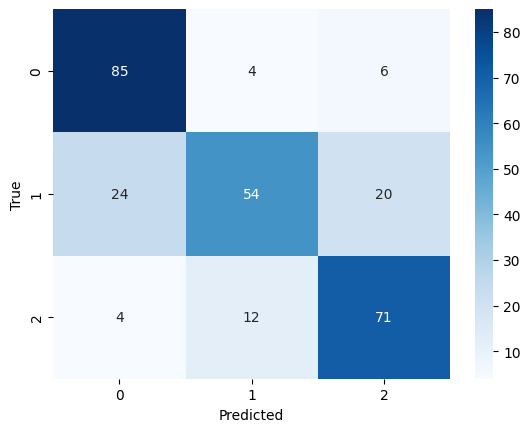


Nilai n =  7
Accuracy: 0.7214285714285714
              precision    recall  f1-score   support

        CPSZ       0.72      0.85      0.78        95
        FNSZ       0.76      0.54      0.63        98
        GNSZ       0.69      0.78      0.74        87

    accuracy                           0.72       280
   macro avg       0.72      0.73      0.72       280
weighted avg       0.73      0.72      0.71       280



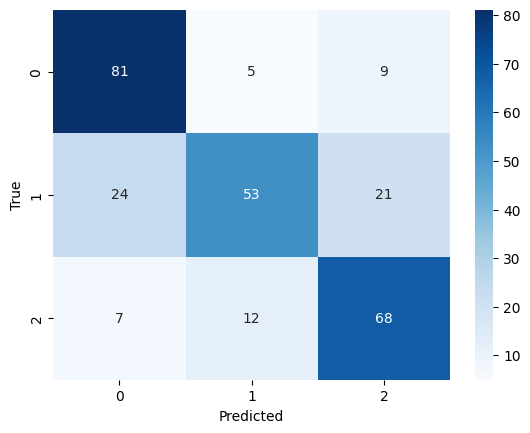


Nilai n =  9
Accuracy: 0.7178571428571429
              precision    recall  f1-score   support

        CPSZ       0.72      0.87      0.79        95
        FNSZ       0.74      0.53      0.62        98
        GNSZ       0.69      0.76      0.73        87

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.71       280
weighted avg       0.72      0.72      0.71       280



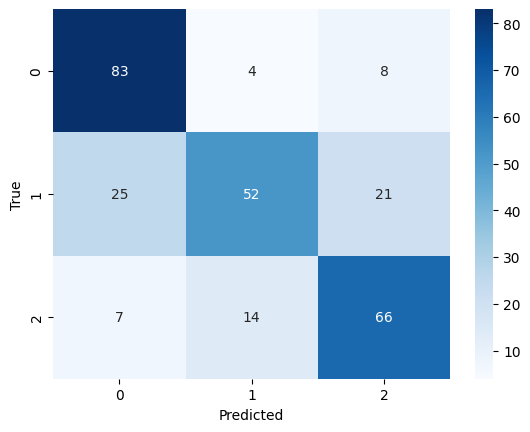

In [10]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = euclidean_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Cosine:

In [11]:
def cosine_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='cosine').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.7892857142857143
              precision    recall  f1-score   support

        CPSZ       0.86      0.73      0.79        95
        FNSZ       0.75      0.97      0.84        98
        GNSZ       0.78      0.66      0.71        87

    accuracy                           0.79       280
   macro avg       0.80      0.78      0.78       280
weighted avg       0.80      0.79      0.78       280



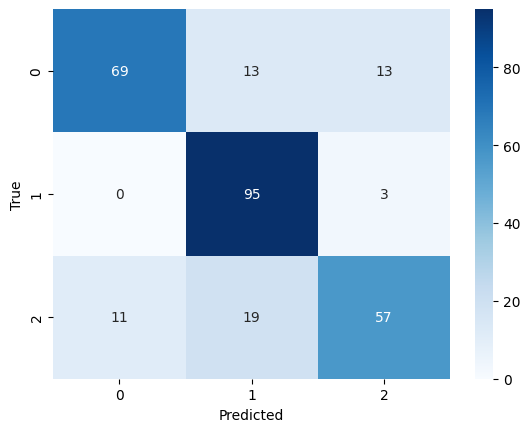


Nilai n =  3
Accuracy: 0.5785714285714286
              precision    recall  f1-score   support

        CPSZ       0.58      0.68      0.63        95
        FNSZ       0.54      0.44      0.48        98
        GNSZ       0.61      0.62      0.62        87

    accuracy                           0.58       280
   macro avg       0.58      0.58      0.58       280
weighted avg       0.58      0.58      0.57       280



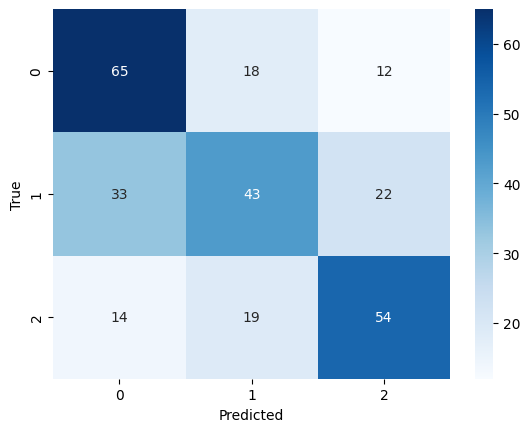


Nilai n =  5
Accuracy: 0.6
              precision    recall  f1-score   support

        CPSZ       0.60      0.72      0.65        95
        FNSZ       0.56      0.51      0.53        98
        GNSZ       0.65      0.57      0.61        87

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.60       280
weighted avg       0.60      0.60      0.60       280



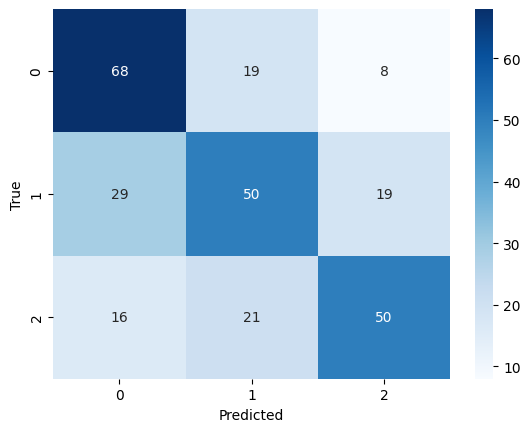


Nilai n =  7
Accuracy: 0.6
              precision    recall  f1-score   support

        CPSZ       0.65      0.67      0.66        95
        FNSZ       0.55      0.54      0.54        98
        GNSZ       0.60      0.59      0.59        87

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.60       280
weighted avg       0.60      0.60      0.60       280



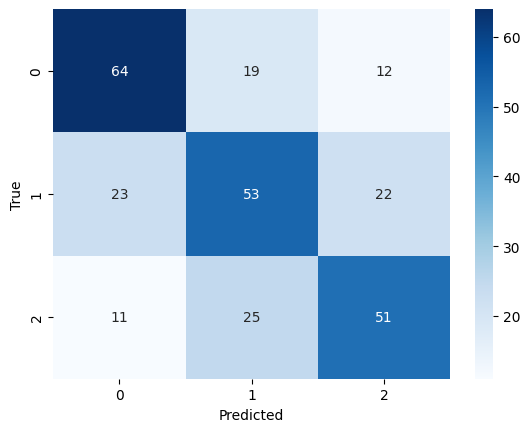


Nilai n =  9
Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

        CPSZ       0.57      0.69      0.63        95
        FNSZ       0.57      0.46      0.51        98
        GNSZ       0.57      0.56      0.57        87

    accuracy                           0.57       280
   macro avg       0.57      0.57      0.57       280
weighted avg       0.57      0.57      0.57       280



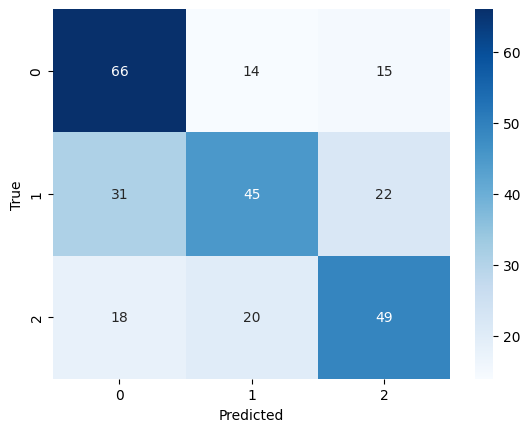

In [12]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = cosine_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Cityblock:

In [13]:
def cityblock_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='cityblock').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.9142857142857143
              precision    recall  f1-score   support

        CPSZ       0.88      0.93      0.90        95
        FNSZ       0.94      0.92      0.93        98
        GNSZ       0.93      0.90      0.91        87

    accuracy                           0.91       280
   macro avg       0.92      0.91      0.91       280
weighted avg       0.92      0.91      0.91       280



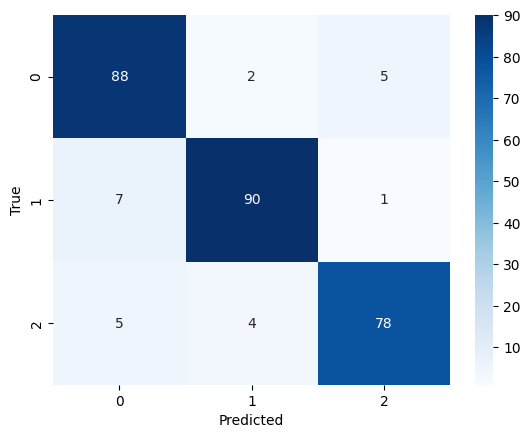


Nilai n =  3
Accuracy: 0.7571428571428571
              precision    recall  f1-score   support

        CPSZ       0.76      0.88      0.82        95
        FNSZ       0.80      0.57      0.67        98
        GNSZ       0.73      0.83      0.77        87

    accuracy                           0.76       280
   macro avg       0.76      0.76      0.75       280
weighted avg       0.76      0.76      0.75       280



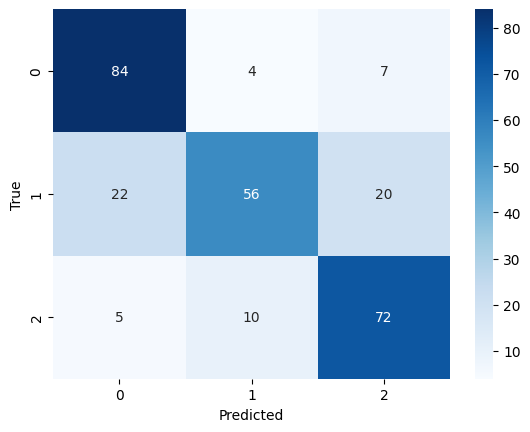


Nilai n =  5
Accuracy: 0.75
              precision    recall  f1-score   support

        CPSZ       0.75      0.87      0.81        95
        FNSZ       0.78      0.58      0.67        98
        GNSZ       0.72      0.80      0.76        87

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.75      0.75      0.74       280



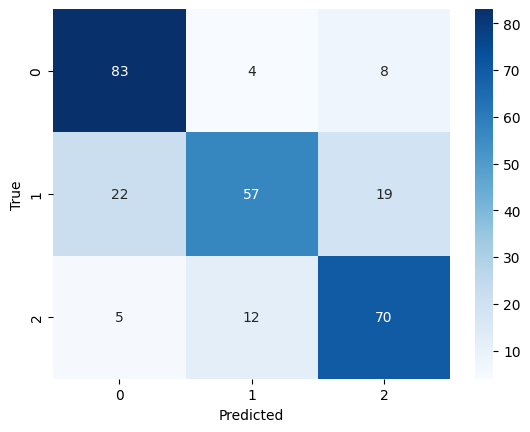


Nilai n =  7
Accuracy: 0.7178571428571429
              precision    recall  f1-score   support

        CPSZ       0.74      0.85      0.79        95
        FNSZ       0.74      0.51      0.60        98
        GNSZ       0.69      0.80      0.74        87

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.71       280
weighted avg       0.72      0.72      0.71       280



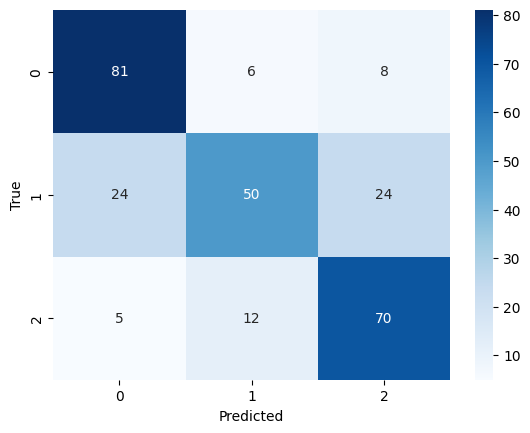


Nilai n =  9
Accuracy: 0.7035714285714286
              precision    recall  f1-score   support

        CPSZ       0.74      0.85      0.79        95
        FNSZ       0.71      0.53      0.61        98
        GNSZ       0.66      0.74      0.70        87

    accuracy                           0.70       280
   macro avg       0.70      0.71      0.70       280
weighted avg       0.70      0.70      0.70       280



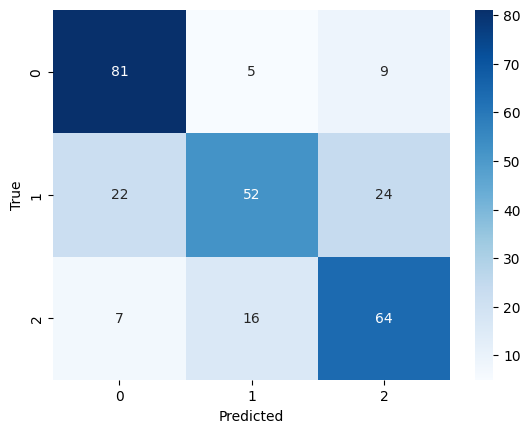

In [14]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = cityblock_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Minkowski:

In [15]:
def minkowski_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='minkowski').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

        CPSZ       0.88      0.93      0.90        95
        FNSZ       0.92      0.92      0.92        98
        GNSZ       0.94      0.89      0.91        87

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280



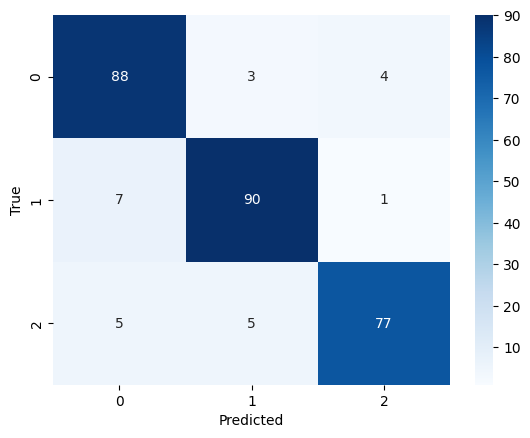


Nilai n =  3
Accuracy: 0.7678571428571429
              precision    recall  f1-score   support

        CPSZ       0.77      0.93      0.84        95
        FNSZ       0.80      0.57      0.67        98
        GNSZ       0.75      0.82      0.78        87

    accuracy                           0.77       280
   macro avg       0.77      0.77      0.76       280
weighted avg       0.77      0.77      0.76       280



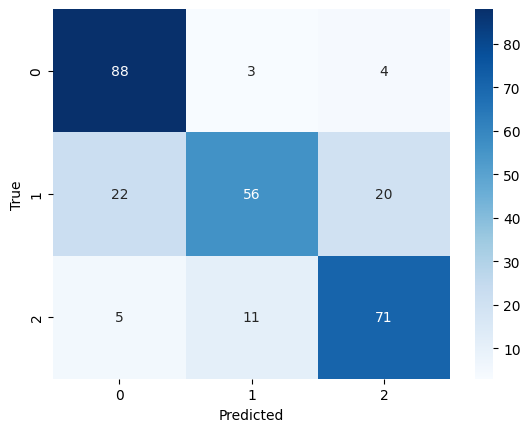


Nilai n =  5
Accuracy: 0.75
              precision    recall  f1-score   support

        CPSZ       0.75      0.89      0.82        95
        FNSZ       0.77      0.55      0.64        98
        GNSZ       0.73      0.82      0.77        87

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.74       280
weighted avg       0.75      0.75      0.74       280



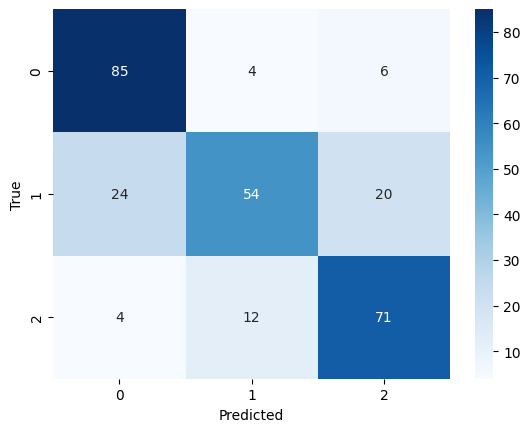


Nilai n =  7
Accuracy: 0.7214285714285714
              precision    recall  f1-score   support

        CPSZ       0.72      0.85      0.78        95
        FNSZ       0.76      0.54      0.63        98
        GNSZ       0.69      0.78      0.74        87

    accuracy                           0.72       280
   macro avg       0.72      0.73      0.72       280
weighted avg       0.73      0.72      0.71       280



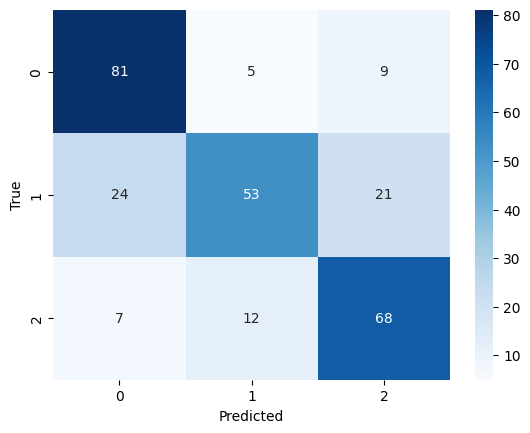


Nilai n =  9
Accuracy: 0.7178571428571429
              precision    recall  f1-score   support

        CPSZ       0.72      0.87      0.79        95
        FNSZ       0.74      0.53      0.62        98
        GNSZ       0.69      0.76      0.73        87

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.71       280
weighted avg       0.72      0.72      0.71       280



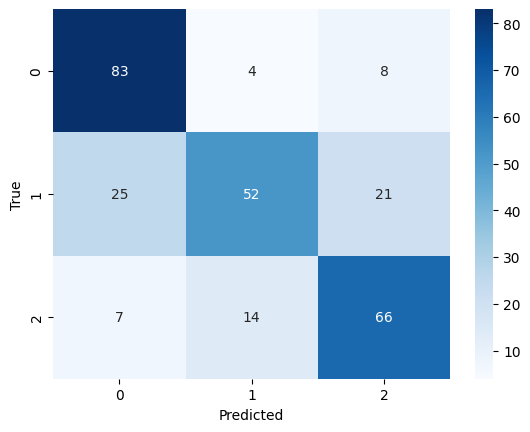

In [16]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = minkowski_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Correlation:

In [17]:
def correlation_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  import scipy
  knn = KNeighborsClassifier(n_neighbors = n, 
                        metric='correlation').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.3357142857142857
              precision    recall  f1-score   support

        CPSZ       0.56      0.11      0.18        95
        FNSZ       0.25      0.01      0.02        98
        GNSZ       0.32      0.95      0.48        87

    accuracy                           0.34       280
   macro avg       0.38      0.36      0.23       280
weighted avg       0.38      0.34      0.22       280



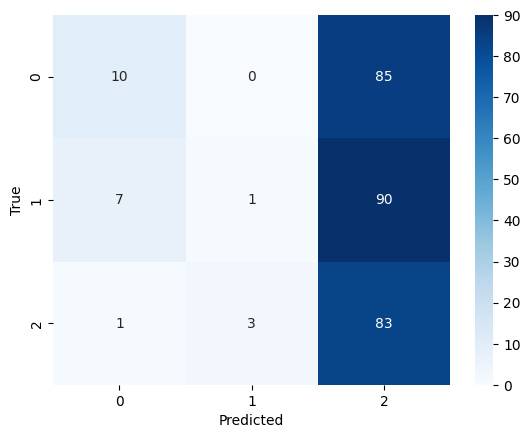


Nilai n =  3
Accuracy: 0.3107142857142857
              precision    recall  f1-score   support

        CPSZ       0.29      0.18      0.22        95
        FNSZ       0.22      0.02      0.04        98
        GNSZ       0.32      0.78      0.45        87

    accuracy                           0.31       280
   macro avg       0.28      0.33      0.24       280
weighted avg       0.28      0.31      0.23       280



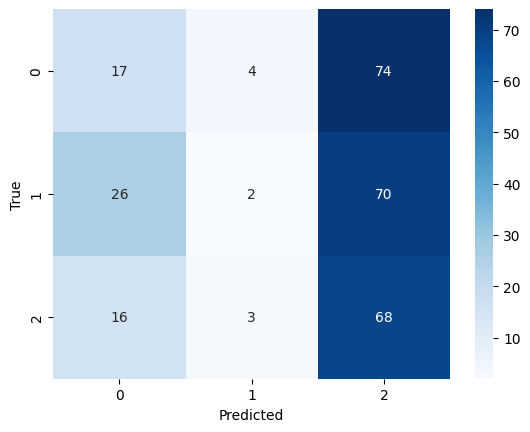


Nilai n =  5
Accuracy: 0.325
              precision    recall  f1-score   support

        CPSZ       0.32      0.46      0.38        95
        FNSZ       0.33      0.30      0.31        98
        GNSZ       0.32      0.21      0.25        87

    accuracy                           0.33       280
   macro avg       0.32      0.32      0.31       280
weighted avg       0.32      0.33      0.32       280



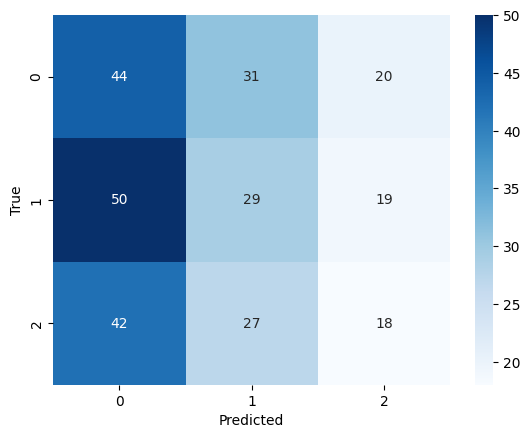


Nilai n =  7
Accuracy: 0.31785714285714284
              precision    recall  f1-score   support

        CPSZ       0.33      0.40      0.36        95
        FNSZ       0.35      0.35      0.35        98
        GNSZ       0.25      0.20      0.22        87

    accuracy                           0.32       280
   macro avg       0.31      0.31      0.31       280
weighted avg       0.31      0.32      0.31       280



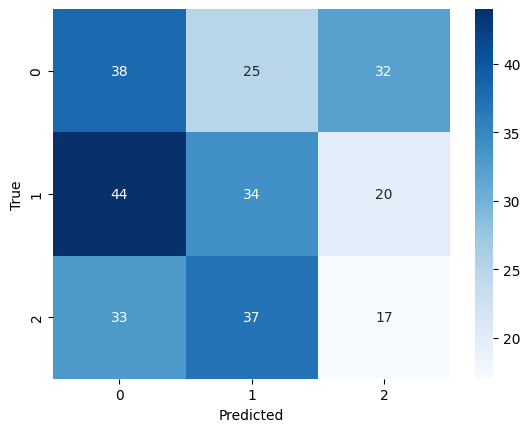


Nilai n =  9
Accuracy: 0.3392857142857143
              precision    recall  f1-score   support

        CPSZ       0.34      0.42      0.38        95
        FNSZ       0.34      0.28      0.30        98
        GNSZ       0.34      0.32      0.33        87

    accuracy                           0.34       280
   macro avg       0.34      0.34      0.34       280
weighted avg       0.34      0.34      0.34       280



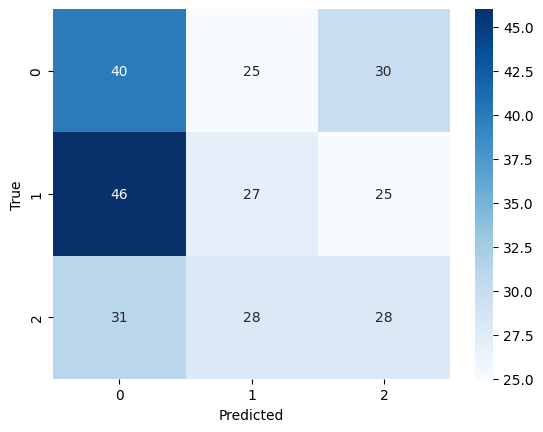

In [19]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = correlation_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()